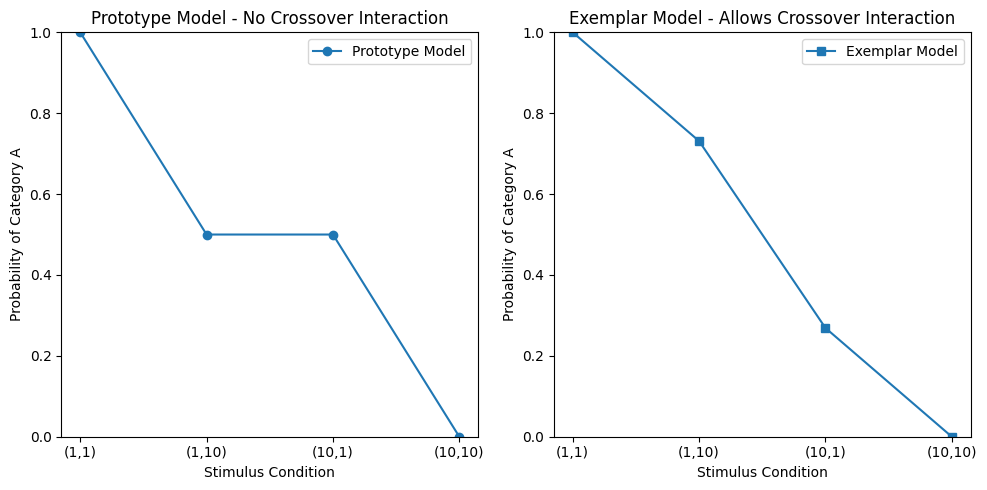

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define prototype-based classification probability
def prototype_classification(s1, s2, alpha, pA, pB):
    """ Computes probability of category A under the Prototype model """
    dA = abs(s1 - pA[0]) + abs(s2 - pA[1])
    dB = abs(s1 - pB[0]) + abs(s2 - pB[1])
    return 1 / (1 + np.exp(alpha * (dA - dB)))

# Define exemplar similarity function
def exemplar_similarity(s, exemplar, alpha, lambd):
    """ Computes similarity between stimulus s and an exemplar """
    return np.exp(-alpha * (abs(s[0] - exemplar[0])**lambd + abs(s[1] - exemplar[1])**lambd))

# Define exemplar-based classification probability
def exemplar_classification(s, exemplars_A, exemplars_B, alpha, lambd):
    """ Computes probability of category A under the Exemplar model """
    sim_A = sum(exemplar_similarity(s, e, alpha, lambd) for e in exemplars_A)
    sim_B = sum(exemplar_similarity(s, e, alpha, lambd) for e in exemplars_B)
    return sim_A / (sim_A + sim_B)

# Stimulus conditions
stimuli = [(1,1), (1,10), (10,1), (10,10)]

# Define prototype centers
pA = (3, 3)  # Prototype for category A
pB = (8, 8)  # Prototype for category B
alpha = 1.0  # Sensitivity parameter

# Compute prototype model probabilities
prototype_probs = [prototype_classification(s1, s2, alpha, pA, pB) for (s1, s2) in stimuli]

# Define exemplars for Exemplar Model
exemplars_A = [(1, 2), (3, 3), (2, 4)]
exemplars_B = [(9, 8), (8, 9), (10, 10)]
lambd = 1  # City Block Distance

# Compute exemplar model probabilities
exemplar_probs = [exemplar_classification(s, exemplars_A, exemplars_B, alpha, lambd) for s in stimuli]

# Plot results
plt.figure(figsize=(10, 5))

# Plot Prototype Model
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3, 4], prototype_probs, marker='o', linestyle='-', label="Prototype Model")
plt.xticks([1, 2, 3, 4], ['(1,1)', '(1,10)', '(10,1)', '(10,10)'])
plt.xlabel("Stimulus Condition")
plt.ylabel("Probability of Category A")
plt.title("Prototype Model - No Crossover Interaction")
plt.ylim(0, 1)
plt.legend()

# Plot Exemplar Model
plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4], exemplar_probs, marker='s', linestyle='-', label="Exemplar Model")
plt.xticks([1, 2, 3, 4], ['(1,1)', '(1,10)', '(10,1)', '(10,10)'])
plt.xlabel("Stimulus Condition")
plt.ylabel("Probability of Category A")
plt.title("Exemplar Model - Allows Crossover Interaction")
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()
